In [39]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [26]:
!ls ../dilution/results_bulk_no_decay

bulk_no_decay.npz


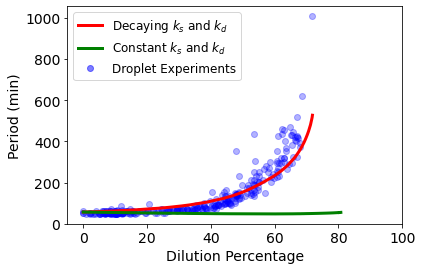

In [34]:
data_path = "../dilution/"
# Bulk Simulation with decay
bulk_path = "results_bulk/bulk_data.npz"
bulk = np.load(data_path + bulk_path, allow_pickle=True)
bulk_period = [d['Per'] if d is not None else np.NaN for d in bulk['feature_list']]
bulk_period = np.array(bulk_period)
# Bulk Simulation without decay
bulk_nd_path = "results_bulk_no_decay/bulk_no_decay.npz"
bulk_nd = np.load(data_path + bulk_nd_path, allow_pickle=True)
bulk_nd_period = [d['Per'] if d is not None else np.NaN for d in bulk_nd['feature_list']]
bulk_nd_period = np.array(bulk_nd_period)
# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']

fig = plt.figure()
ax = plt.gca()
ax.plot(100*(1-bulk['dil_list']), bulk_period, color='red', linewidth=3, 
        label=r'Decaying $k_{s}$ and $k_{d}$', zorder=1)
ax.plot(100*(1-bulk_nd['dil_list']), bulk_nd_period, color='green', linewidth=3, 
        label='Constant $k_{s}$ and $k_{d}$', zorder=1)
# Experimental data
plt.plot(xdata, aux['frameStep'][0]*ydata, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Droplet Experiments' )
ax.tick_params(labelsize=14)
#ax.lines[-1].set_label('Experiments')
ax.set_xlim([-5, 100])
ax.set_xlabel('Dilution Percentage', fontsize=14)
ax.set_ylabel('Period (min)', fontsize=14)
leg = ax.legend(loc='upper left', fontsize=12)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.5)
plt.savefig('./SVGs/Decay_no_decay.svg', format='svg', bbox_inches='tight')
plt.show()

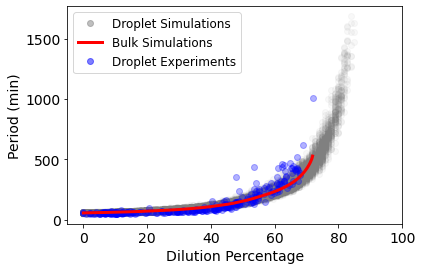

In [11]:
data_path = "../dilution/"
droplets_path = "results_droplets_cluster/"
cmd = ["ls", data_path + droplets_path]
proc = subprocess.Popen(cmd, stdout=subprocess.PIPE)
stdout, stderr = proc.communicate()
file_list = stdout.decode("utf-8").split()
# Droplet Simulations
dil, per = [], []
for f in file_list:
    data = np.load(data_path + droplets_path + f, allow_pickle=True)
    aux_periods = [d['Per'] for d in data['feature_list'] if d is not None]
    aux_amplitudes = [d['Amp'] for d in data['feature_list'] if d is not None]
    pa = list(zip(aux_periods, aux_amplitudes))
    # Filter out small amplitude solutions
    periods = [l[0] for l in pa if l[1] > 0.1]
    per += periods
    dil += (data['dil']*np.ones(len(periods))).tolist()
dil = np.array(dil)
per = np.array(per)
# Bulk Simulation
bulk_path = "results_bulk/bulk_data.npz"
bulk = np.load(data_path + bulk_path, allow_pickle=True)
bulk_period = [d['Per'] if d is not None else np.NaN for d in bulk['feature_list']]
bulk_period = np.array(bulk_period)
# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']

fig = plt.figure()
ax = plt.gca()
# Droplet Simulations
ax.plot(100*(1-dil), per, 'o', color='gray', alpha=0.05, 
        label='Droplet Simulations', zorder=-1, rasterized=True)
# Bulk Simulation
ax.plot(100*(1-bulk['dil_list']), bulk_period, color='red', linewidth=3, 
        label='Bulk Simulations', zorder=1)
# Experimental data
plt.plot(xdata, aux['frameStep'][0]*ydata, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Droplet Experiments' )
# Plot parameters
ax.tick_params(labelsize=14)
#ax.lines[-1].set_label('Experiments')
ax.set_xlim([-5, 100])
ax.set_xlabel('Dilution Percentage', fontsize=14)
ax.set_ylabel('Period (min)', fontsize=14)
leg = ax.legend(loc='upper left', fontsize=12)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.5)
plt.savefig('./SVGs/Per_vs_Dil.svg', format='svg', bbox_inches='tight')
plt.show()

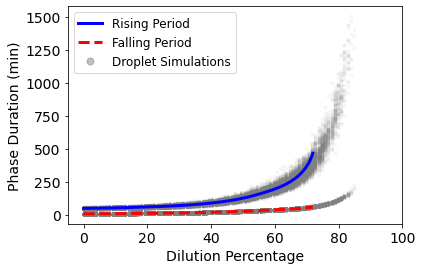

In [22]:
data_path = "../dilution/"
droplets_path = "results_droplets_cluster/"
cmd = ["ls", data_path + droplets_path]
proc = subprocess.Popen(cmd, stdout=subprocess.PIPE)
stdout, stderr = proc.communicate()
file_list = stdout.decode("utf-8").split()
# Droplet Simulations
dil, rise, fall = [], [], []
for f in file_list:
    data = np.load(data_path + droplets_path + f, allow_pickle=True)
    aux_rise = [d['Rise'] for d in data['feature_list'] if d is not None]
    aux_fall = [d['Fall'] for d in data['feature_list'] if d is not None]
    aux_amplitudes = [d['Amp'] for d in data['feature_list'] if d is not None]
    ra = list(zip(aux_rise, aux_amplitudes))
    fa = list(zip(aux_fall, aux_amplitudes))
    # Filter out small amplitude solutions
    rising = [l[0] for l in ra if l[1] > 0.1]
    falling = [l[0] for l in fa if l[1] > 0.1]
    rise += rising
    fall += falling
    dil += (data['dil']*np.ones(len(rising))).tolist()
dil = np.array(dil)
rise = np.array(rise)
fall = np.array(fall)
# Bulk Simulation
bulk_path = "results_bulk/bulk_data.npz"
bulk = np.load(data_path + bulk_path, allow_pickle=True)
bulk_rise = [d['Rise'] if d is not None else np.NaN for d in bulk['feature_list']]
bulk_fall = [d['Fall'] if d is not None else np.NaN for d in bulk['feature_list']]
bulk_rise = np.array(bulk_rise)
bulk_fall = np.array(bulk_fall)

fig = plt.figure()
ax = plt.gca()
# Bulk Simulation
ax.plot(100*(1-bulk['dil_list']), bulk_rise, color='blue', linewidth=3, 
        label='Rising Period', zorder=1)
ax.plot(100*(1-bulk['dil_list']), bulk_fall, color='red', linewidth=3, 
        label='Falling Period', zorder=1, linestyle='--')
# Droplet Simulations
ax.plot(100*(1-dil), rise, 'o', color='gray', alpha=0.05, markersize=3,
        label='Droplet Simulations', zorder=-1, rasterized=True)
ax.plot(100*(1-dil), fall, 'o', color='gray', alpha=0.05, markersize=3,
        zorder=-1, rasterized=True)
# Plot parameters
ax.tick_params(labelsize=14)
#ax.lines[-1].set_label('Experiments')
ax.set_xlim([-5, 100])
ax.set_xlabel('Dilution Percentage', fontsize=14)
ax.set_ylabel('Phase Duration (min)', fontsize=14)
leg = ax.legend(loc='upper left', fontsize=12)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.5)
    lh._legmarker.set_markersize(7)
plt.savefig('./SVGs/Rising_Falling_vs_Dil.svg', format='svg', bbox_inches='tight')
plt.show()

In [36]:
raster_file_list = !ls ../dilution/results_raster/
folder_raster = '../dilution/results_raster/'
raster_dict = {}
for f in raster_file_list:
    data = np.load(folder_raster + f, allow_pickle=True)
    raster_dict[str(data['dil'])] = data

In [37]:
all_data_raster = pd.DataFrame(columns = ['Dil','Times','PeakID'])
for dil in raster_dict:
    for time_list in raster_dict[dil]['data_raster']:
        if type(time_list) == list:
            i_vals = range(len(time_list))
            y_vals = 100*(1-float(dil)*np.ones(len(time_list))) 
            to_add = pd.DataFrame(list(zip(time_list, y_vals, i_vals)),columns=['Times', 'Dil', 'PeakID'])
            all_data_raster = all_data_raster.append(to_add)

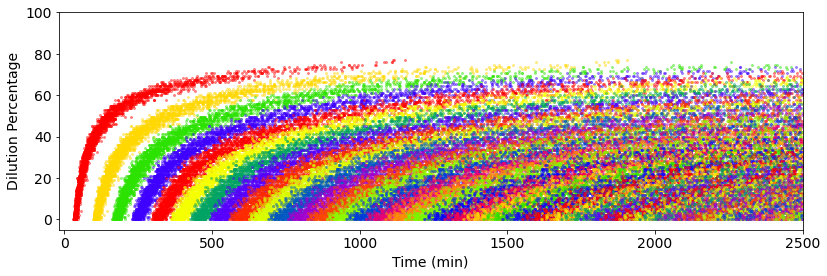

In [44]:
col_max = 40
mk = 'o'
mksize = 2
ftsize = 14
tksize = 14
aspect_ratio = 0.3
colormap = 'prism'

cmap = matplotlib.cm.get_cmap(colormap)
w, h = matplotlib.figure.figaspect(aspect_ratio)
fig, ax = plt.subplots(figsize = (w,h))

for idx,peak in enumerate(all_data_raster['PeakID'].unique()):
  # Single cell raster
  col = cmap(peak/col_max)#max(all_data_raster['PeakID'].unique()))
  plot_df = all_data_raster.loc[all_data_raster['PeakID'] == peak]
  ax.plot(plot_df['Times'],plot_df['Dil'], marker = mk, rasterized=True, 
          linestyle = 'None', color = col, markersize = mksize, alpha = 0.4, zorder = 0)
  # Bulk raster
  #plot_bulk = bulk_raster.loc[bulk_raster['PeakID'] == peak]
  #ax.plot(plot_bulk['Times'],plot_bulk['Dil'], marker = 'None', 
  #        linestyle = '-', color = 'k', zorder = 1, linewidth = 3)
  
#fig.set_size_inches(18.5, 10.5)
ax.set_xlim([-20,2500])
ax.set_ylim([-5,100])
ax.tick_params(labelsize = tksize)
ax.set_xlabel('Time (min)', fontsize = ftsize)
ax.set_ylabel('Dilution Percentage', fontsize = ftsize)
plt.savefig('./SVGs/Raster_plot.svg', format='svg', bbox_inches='tight')

plt.show()